# Erdos Renyi graph generation

In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from curved_edges import curved_edges
from matplotlib.collections import LineCollection
from copy import copy
#from utils import plot_degree_dist, plot_grafo
from graph_generation import perturb_np_array, perturb_nx_graph

In [18]:
dpi = 96
edge_color = '#6666bb'
node_color = '#df5c43'
def plot_grafo2(G, iterations, nome_file=None):
    plt.figure(figsize=(1000/dpi,1000/dpi))
    print("Draw nodes")
    positions = nx.spring_layout(G, k=1.8, iterations=iterations)
    degrees = dict(G.degree)
    sizes = [v*2 + v*v/10  for v in degrees.values()]
    nx.draw_networkx_nodes(G, positions, node_size=sizes, node_color=node_color, alpha=0.7)
    print("Draw edges")
    ax = plt.gca()
    edges_weights = [d['weight']/30 if 'weight' in d.keys() else 1 for (u, v, d) in G.edges(data=True)]
    custom_draw_edges(ax, G, positions, edges_weights)
    print("Plot")
    plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
    plt.setp(ax.spines.values(), visible=False)
    fig = plt.gcf()
    fig.tight_layout()
    cut = 1.00
    #xmax = cut * max(xx for xx, yy in positions.values())
    #ymax = cut * max(yy for xx, yy in positions.values())
    #plt.xlim(0, xmax)
    #plt.ylim(0, ymax)
    if(nome_file is not None):
        print("Save graph png")
        plt.savefig(nome_file, dpi=dpi * 10)
    print("Show")
    plt.savefig('graph1.png', transparent=True)
    plt.show()

def custom_draw_edges(ax, G, positions, edges_weights):    
    
    #disegno le edges curve
    curves = curved_edges(G, positions)
    lc = LineCollection(curves, color=edge_color, alpha=0.2, linewidths=edges_weights)
    new_lc=copy(lc) # faccio la copy perché se rieseguo la cella dà errore matplotlib
    ax.add_collection(new_lc)
    
    return ax
    
    plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklines(), visible=False)
    plt.setp(ax.get_yticklines(), visible=False)
    #plt.setp(ax.spines.values(), visible=False)

In [19]:
N = 100 # Graph nodes number
p_er = 0.6   # Probability for edge creation

In [20]:
gr_er1 = nx.erdos_renyi_graph(N, p_er)  # seed = 1

### Plot graph

Draw nodes
Draw edges
Plot
Show


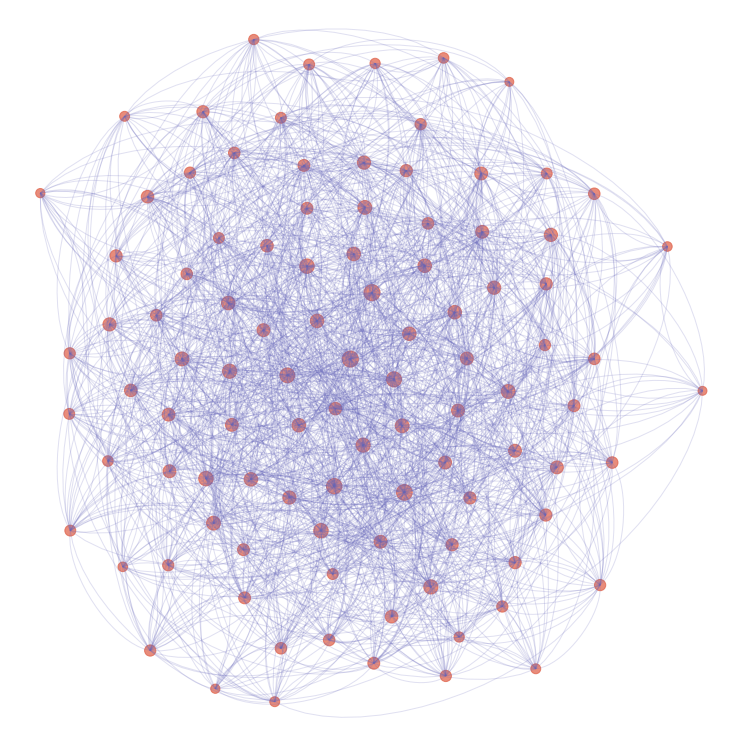

In [17]:
plot_grafo2(gr_er1, 300)

Draw nodes
Draw edges
Plot
Show


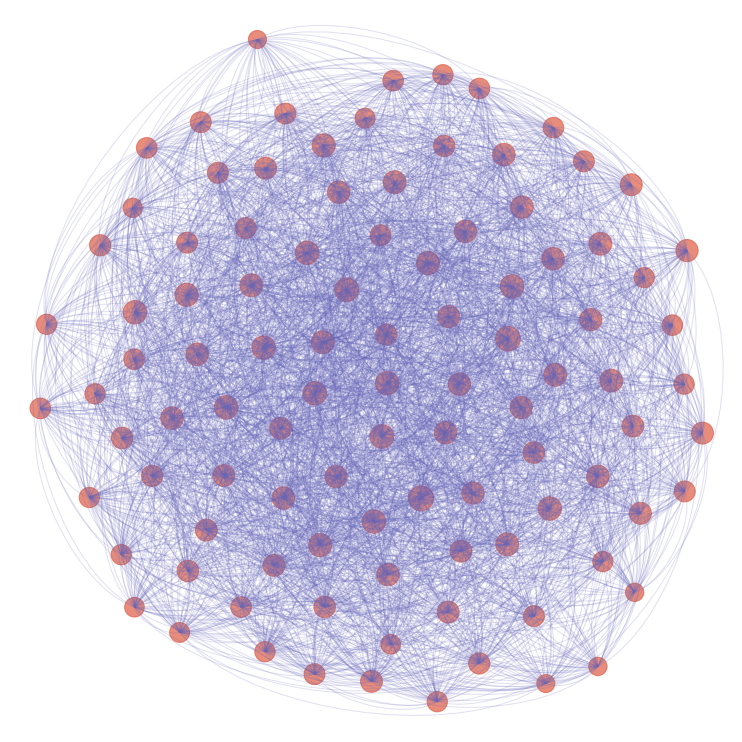

In [21]:
plot_grafo2(gr_er1, 240)

# Graph perturbation

In [77]:
reg = nx.random_regular_graph(d=4, n=300)
print(round(nx.to_numpy_matrix(reg).sum(axis=1).mean().mean(), 3))
graph_perturbed = perturb_nx_graph(reg, 0.7, True)
#print(f"effective noise: {round(effective_noise.sum(axis=1).mean().mean(), 3)}")
print(round(nx.to_numpy_matrix(graph_perturbed).sum(axis=1).mean().mean(), 3))
perturbed_array = nx.to_numpy_array(graph_perturbed)

4.0
% valori > 1: 0.23608888888888888, valori < -1 : 0.23816666666666667
73.07


# prova

In [68]:
reg = nx.random_regular_graph(d=62, n=300)
np_array = nx.to_numpy_array(reg).astype(int)
print(f"Original mean: {np_array.sum(axis=1).mean()}")


Original mean: 62.0


In [55]:
perturbed = np.logical_xor(np_array,effective_noise).astype(int)
print(f"Perturbed mean: {perturbed.sum(axis=1).mean()}")

Perturbed mean: 63.2


### prova2  non va bene neanche questa, dà lo stesso risultato dell'altra , ma ho bisogno di mantenere uguale la connettività media

In [7]:
mask = np.random.randint(0,2,size=np_array.shape).astype(bool)
r = np.random.rand(*np_array.shape)*np.max(np_array)
x[mask] = r[mask]

### prova3:  devo creare tante modifiche da 0 a 1 quante sono le modifiche da 1 a 0
##### magari prendo una maschera equa dalla matrice di adiacenze

In [324]:
reg = nx.random_regular_graph(d=10, n=300)
np_array_orig = nx.to_numpy_array(reg).astype(int)
np_array = np_array_orig.copy()

In [325]:
uni = np_array == 1
zeri = np_array == 0
print(uni.sum(), zeri.sum(), np_array.size, uni.shape)

3000 87000 90000 (300, 300)


In [326]:
p = 130

In [327]:
s_create = np.random.binomial(1, p/zeri.sum(), zeri.sum())#.astype(bool)
s_delete = np.random.binomial(1, p/uni.sum(), uni.sum())#.astype(bool)

In [328]:
print(f"1: {np_array[uni].sum()}, 0:{np.logical_not(np_array[zeri]).sum()}, elementi che saranno aggiunti: {s_create.sum()}, elementi che saranno tolti: {s_delete.sum()}")

1: 3000, 0:87000, elementi che saranno aggiunti: 96, elementi che saranno tolti: 132


In [329]:
np_array[uni] = np.logical_xor(np_array[uni], s_delete).astype(int)
np_array[zeri] = np.logical_xor(np_array[zeri], s_create).astype(int)

In [330]:
print(f"1: {np_array[uni].sum()}, 0:{np.logical_not(np_array[zeri]).sum()}, elementi che saranno aggiunti: {s_create.sum()}, elementi che saranno tolti: {s_delete.sum()}")

1: 2868, 0:86904, elementi che saranno aggiunti: 96, elementi che saranno tolti: 132


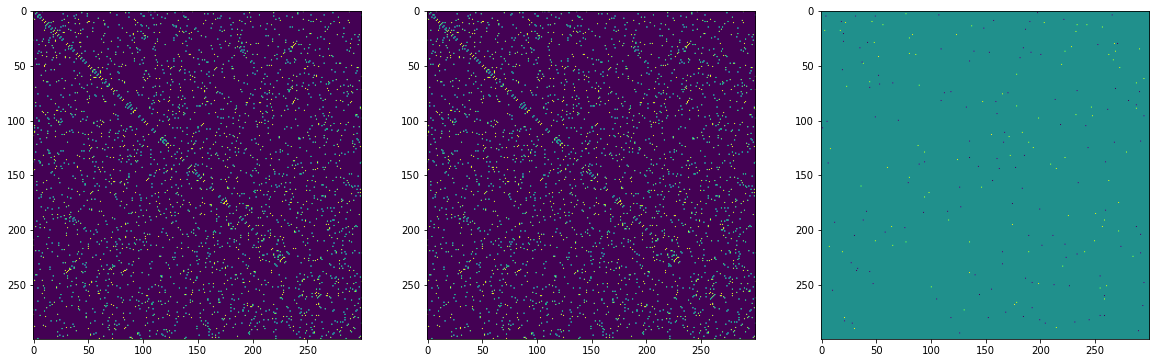

In [331]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(np_array_orig)
ax2.imshow(np_array)
ax3.imshow(np_array-np_array_orig)
plt.show()

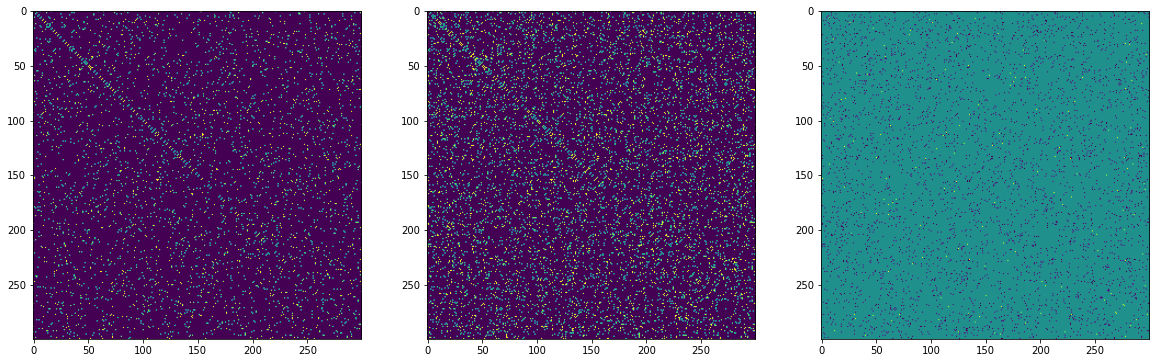

# Generazione dataset

In [13]:
# probabilità minima log(n)/n
np.log(300)/300

0.019012608248854004

In [4]:
N = 300 # Graph nodes number
p_er = 0.02   # Probability for edge creation
Num_grafi_per_tipo = 100 # ogni tot abbiamo un tipo di grafi originato da una diversa distribuzione

grafi_0 = []
for i in range(Num_grafi_per_tipo):
    gr_er = nx.erdos_renyi_graph(N, p_er)  # seed = 1
    grafi_0.append(nx.to_numpy_matrix(gr_er))
    
p_er = 0.6
grafi_1 = []
for i in range(Num_grafi_per_tipo):
    gr_er = nx.erdos_renyi_graph(N, p_er)  # seed = 1
    grafi_1.append(nx.to_numpy_matrix(gr_er))

In [5]:
dataset_grafi = np.array(grafi_0 + grafi_1)

In [6]:
dataset_grafi.shape

(200, 300, 300)

##### verifico la connettività nel caso di ER

In [7]:
tipo1 = dataset_grafi[:Num_grafi_per_tipo]
tipo2 = dataset_grafi[Num_grafi_per_tipo:]

print(np.array([t.sum(axis=1).mean() for t in tipo1]).mean())
print(np.array([t.sum(axis=1).mean() for t in tipo2]).mean())

5.9879333333333316
179.37973333333332


### Regular graphs

In [11]:
regular_g = [nx.random_regular_graph(d=12, n=300) for i in range(50)]

In [12]:
print(np.array([nx.to_numpy_matrix(t).sum(axis=1).mean() for t in regular_g]))

[12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]


# Configuration model con power law

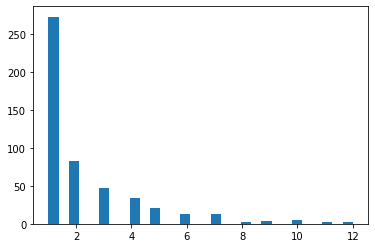

In [3]:
def rndm(a, b, g, size=1):
    """Power-law gen for pdf(x)\propto x^{g-1} for a<=x<=b"""
    r = np.random.random(size=size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

sequence = rndm(1, 13, -1, 500)
sequence = np.array(sequence,int)
if sequence.sum()%2!=0:
    sequence[0] +=1
plt.hist(sequence, bins=30);

In [5]:
#sequence = nx.random_powerlaw_tree_sequence(100, tries=5000)
G = nx.configuration_model(sequence)

In [75]:
# verifico il caso fortunato per cui il grado iniziale risulta uguale al grado finale 
actual_degrees = [d for v, d in G.degree()]
actual_degrees_sorted = sorted(actual_degrees, reverse=True)
np.all(actual_degrees == sequence2)

False

In [76]:
# remove multiple edges and self loops
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

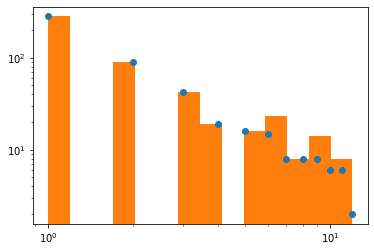

In [77]:
#istogramma in modo diverso
plt.loglog(*np.unique(actual_degrees_sorted, return_counts=True), 'o')

bins = np.logspace(np.log10(min(actual_degrees)), np.log10(max(actual_degrees)), 15)
plt.hist(actual_degrees, bins=bins, log=True);
plt.loglog()
plt.show()

In [1]:
plt.loglog(actual_degrees_sorted,'o-') 
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title("sequenza dei gradi?");

NameError: name 'plt' is not defined

(1./g) = -100.0 § g = -0.01


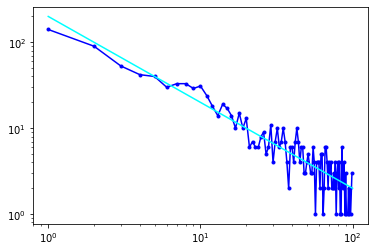

In [21]:
# studio un pò la distribuzione risultante in fumnzione dei parametri...
# devo mettere b = 100 almeno
def rndm(a, b, g, size=1):
    """Power-law gen for pdf(x)\propto x^{g-1} for a<=x<=b"""
    r = np.random.random(size=size)
    ag, bg = a**g, b**g
    exp = (1./g)
    #exp = g
    res = (ag + (bg - ag)*r)**exp
    print(f"(1./g) = {1./g} § g = {g}")
    return res

degree_sequence = rndm(1,100, -0.01, 1000)
degs = np.array(degree_sequence, int)
plt.loglog(*np.unique(degs, return_counts=True), color='blue', marker='.');
xx1 = np.logspace(0, 2, 100)
yy1 = (xx1**-1)*200
plt.loglog(xx1, yy1, color='cyan')
plt.show()

(1./g) = -0.49751243781094534 § g = -2.01


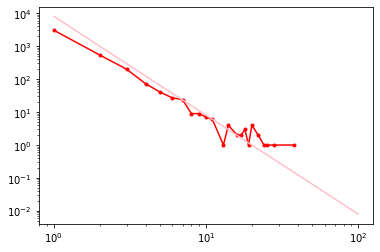

In [31]:
degree_sequence2 = rndm(1,100, -2.01, 4000)
degs2 = np.array(degree_sequence2, int)
plt.loglog(*np.unique(degs2, return_counts=True), color='red', marker='.');
xx3 = np.logspace(0, 2, 100)
yy3 = (xx3**-3)*8000
plt.loglog(xx3, yy3, color='pink')

plt.show()

In [80]:
len(degs2)

90000

In [32]:
import scipy.stats as sps

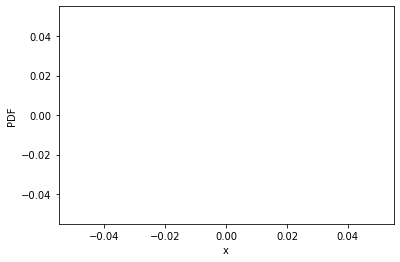

In [33]:
alpha = 2
dist = sps.powerlaw(a=alpha)
x = np.linspace(dist.ppf(0.0001), dist.ppf(9.999), 1000)
pdf = dist.pdf(x)
plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('PDF');

# Salvo   non compresso ma di grandi dimensioni
np.save('dataset_grafi.npy', dataset_grafi)

In [ ]:
# per caricare:
# data = load('dataset_grafi.npy')

In [8]:
# compresso:
        
np.savez_compressed('dataset_grafi_N300_compressed.npz', dataset_grafi)

In [ ]:
# per caricare:
# data = load('dataset_grafi_compressed.npz')